# Benign or Malignant Cancer Cells Based on Attributes

<u>_Group Members:_</u>
- Eli Brignac ebrignac@udel.edu
- Jonathan Ma johnma@udel.edu
- Xiaofan Li xiaofan@udel.edu

[Data Set Here](https://www.kaggle.com/datasets/erdemtaha/cancer-data)

In [173]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split

In [174]:
#Load the dataset
df = pd.read_csv("Cancer_Data.csv")
# print(df.head())
print(df.shape)

(569, 33)


# The Dataset

569 cancer cells and 33 features to determine whether the cancer cells in our data are benign or malignant. 30 of these 33 features are all numerical features making this problem suitable for a NN. Of these 569 cells, 357 of them (62.74%) are labeled as Benign and 212 of them (37.26%) are Malignant.

Before we begin training our model, we must clean up the data. We start by removing the `id` column as it doesn't provide any useful information. Next, we map the `diagnosis` attribute to 1 for a Malignant tumor and 0 for a Benign Tumor. Finally, we remove a random column titled `Unnamed: 32` as it doesn't provide any useful infromation.

We are left with 569 rows, and 31 columns. 1 column is the diagnosis (ouput value), while the other 30 are the statistics about the tumors (input values).

In [200]:
data = df.drop('id', axis=1)

data['diagnosis'] = df['diagnosis'].map({'M': 1 , 'B':0})
data = data.drop('Unnamed: 32', axis = 1)
print("Shape of Data we are using:",data.shape)
# print(data.head())

#The line below prints the amount of Benign and Malignant tumors in our dataset
#print(df['diagnosis'].value_counts())

Shape of Data we are using: (569, 31)
B    357
M    212
Name: diagnosis, dtype: int64


# Training and Test samples
We are using a 70:30 Train-Test split for our model which is a rather large testing split, but as you will see later, our model has remarkable accuracy so a large testing dataset isn't counter productive.

In [176]:
#Set the Random State for our models, this can be changed or 
random_state = 42
X, y = data.drop('diagnosis', axis=1), data['diagnosis']
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X,y, test_size = .3, random_state = random_state)


#Scale the Training and Testing Data
#This scales all of the data to have a standard deviation of 1 and mean 0
#(Standardizes the data so its a Z score)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


#print(X_train)
#print(y_train)

<img src="31x16x16x1.png" width="80%" height="10%">

This is a diagram of the layout of the model we are using. It has 30 input neurons and 2 hidden layers with 15 neurons each. The ouput layer is 1 neuron because it is a binary classifier (Malignant or Benign).

# Trained on Scaled Data

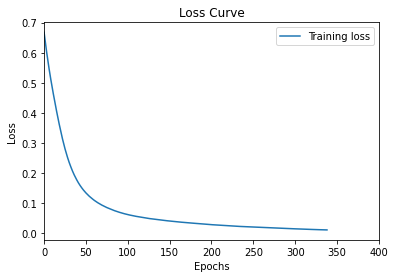

Accuracy: 0.9824561403508771


In [177]:
from sklearn.neural_network import MLPClassifier
# Create an MLP object with 2 hidden layers, each with 16 neurons
mlp = MLPClassifier(hidden_layer_sizes=(16, 16), max_iter=1000, activation='relu',
                    solver='adam', batch_size = 256, random_state = random_state)

# Train the MLP using the input and output datasets
model = mlp.fit(X_train, y_train)

# Plot the training and validation loss
plt.plot(model.loss_curve_, label='Training loss')

if mlp.validation_scores_ != None:
    plt.plot(mlp.validation_scores_)
plt.title('Loss Curve')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.xlim(0,400)
plt.show()
accuracy = mlp.score(X_test, y_test)
print(f"Accuracy: {accuracy}")

The loss curve is a graphical representation of the performance of a machine learning model during the training process. In this case, the curve shows that the loss (also known as error) of the model is continuously decreasing over time. This is a good sign, as it indicates that the model is improving in accuracy and becoming more effective at making predictions with each epoch. The line starts at around ~.7, showing it has ~30% accuracy at the start of training and it ends at ~.02 showing it has ~98% accruacy by the end of training.

# Plotting Learning Curve

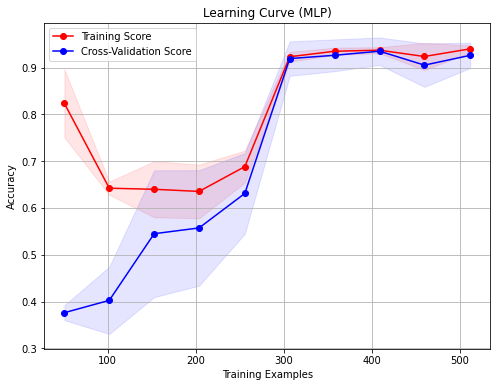

In [178]:
from sklearn.model_selection import learning_curve

# do 10 fold cross validation (cv = 10)
train_sizes, train_scores, test_scores = learning_curve(model, X, y, train_sizes=[.1,.2,.3,.4,.5,.6,.7,.8,.9, 1], cv=10, n_jobs=-1)



# Compute the mean and standard deviation of the train and test scores
train_scores_mean = train_scores.mean(axis=1)
train_scores_std = train_scores.std(axis=1)
test_scores_mean = test_scores.mean(axis=1)
test_scores_std = test_scores.std(axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.title('Learning Curve (MLP)')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy')
plt.grid()
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1,
                 color='r')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1,
                 color='b')
plt.plot(train_sizes, train_scores_mean, 'o-', color='r',
         label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color='b',
         label='Cross-Validation Score')
plt.legend(loc='best')
plt.show()

The plot above is a learning curve tested using 10-fold cross validation.


The x-axis represents the number of training examples used in the model's training, while the y-axis represents the accuracy of the model on both the training set (in red) and the cross-validation set (in blue). The learning curve is a graphical representation of how the model's accuracy improves as the number of training examples increases. The shaded regions around the curves show the standard deviation of the accuracy scores.


As we can see from the plot of the learning curve above, our model starts out overfitting as the gap between the training score and cross validation score is very large. As the amount of training examples increases, the gap between the training and cross-validation scores decreases which suggests that the model is becoming less overfit as more data is added. Towards the end of training, the gap between the training score and cross-validation score is very small, suggesting that our model properly fits the dataset.

The accuracy of the model on both the training and cross-validation sets appear to platue at around 300+ training examples which suggests that adding more data beyond this point will not lead to significant improvements in the model's accuracy.


# Confusion Matrix

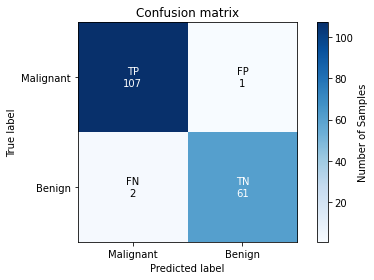

In [179]:
from sklearn.metrics import confusion_matrix
# use the model to predict class labels for test data
y_pred = mlp.predict(X_test)

# generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

classes = ['Malignant', 'Benign']
# plot confusion matrix with labels
classes = ['Malignant', 'Benign']
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax, label ="Number of Samples")
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')

# add text labels to each box
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        label = ''
        if i == 0 and j == 0:
            label = 'TP'
        elif i == 0 and j == 1:
            label = 'FP'
        elif i == 1 and j == 0:
            label = 'FN'
        else:
            label = 'TN'
        
        ax.text(j, i, format(label + '\n' + str(cm[i, j]), 's'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
        
#         ax.text(j, i, f"{['TN', 'FP'][j>i]}-{['FN', 'TP'][j>i]}",
#                 ha="center", va="top", fontsize=10,
#                 color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

#Prints out the FN and FP inputs.
# for i in range(len(y_test)):
#     if y_test.iloc[i] == 1 and y_pred[i] == 0:
#         print("FN\n", df.iloc[i], '\n')
#     elif y_test.iloc[i] == 0 and y_pred[i] == 1:
#         print("FP\n", df.iloc[i], '\n')



The figure above is a confusion matrix

A confusion matrix is a table used to evaluate the performance of a classification model. It compares the predicted and actual classes of a set of test data and displays the results in a matrix format. The matrix consists of four quadrants, where the vertical axis shows the actual class labels, and the horizontal axis shows the predicted class labels. The four quadrants are:

    1) True Positive (TP): The number of correctly predicted positive samples.
    2) False Positive (FP): The number of incorrectly predicted positive samples.
    3) False Negative (FN): The number of incorrectly predicted negative samples.
    4) True Negative (TN): The number of correctly predicted negative samples.
    
We can calulate the accuracy of the model with this infomation by dividing the amount of correctly predicted cases to the amount of inccorectly predicted cases

$$
\frac{T_P+T_N}{T_P+F_P+F_N+T_N} = \frac{107+61}{107+1+2+61} = \frac{168}{171} = .982456 \approx 98.25\%
$$


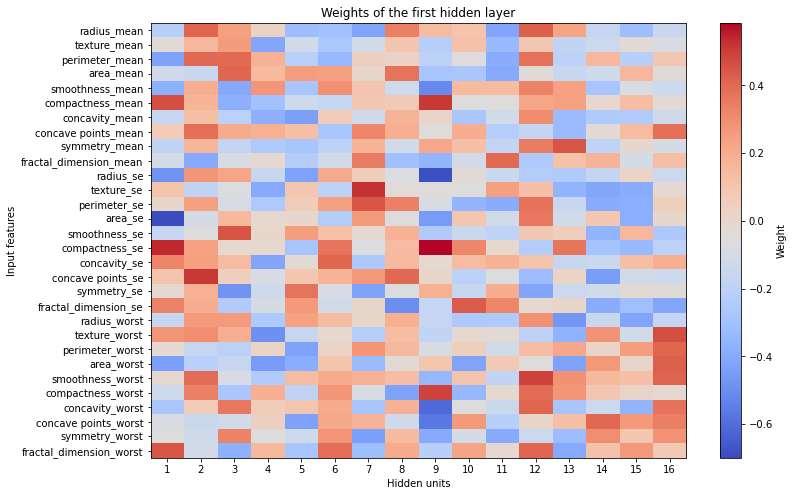

In [180]:
weights = model.coefs_[0]
# print(model.coefs_[0])
# print(weights.shape)
plt.figure(figsize=(12, 8))

plt.imshow(weights, cmap='coolwarm', aspect='auto')
plt.colorbar(label = "Weight")
plt.title('Weights of the first hidden layer')
plt.xlabel('Hidden units')

x_lab = [i for i in range(1, 17)]
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(len(x_lab)), x_lab, rotation=0)
plt.ylabel('Input features')
plt.show()

This heatmap is a plot that shows the weights of the first hidden layer, where each row corresponds to a different input feature, and each column corresponds to a different hidden unit. The color of each element in the plot represents the weight value. This is a cool method of visualizing how the inputs are weighed in the first hidden layer of our model.